In [1]:
# Modules and Scripts are allmost the same thing, the difference is largely down to how we use them.

# We could run the script as it is, with the command "run scgenotyping.py"
# This would execute the script that comes after the "if __name__ = "__main__"" part.

# long with executing the scipt, all the functions defined in that script are now available
# hough it is probably not a good idea to use the functions this way, as we now don't know excactly
# where they come from, they just magically appeared.

# So instead I suggest importing the bunch bunch of functions as module

import scgenotyping as sg

In [2]:
#The difference is that A) only the parts BEFORE the "if __main__..." get executed
# and B) you need to treate it like a module: Functions need to be preceded with the modules name or shortname.
# This might seem to be a bit more cumbersome, but at least functions don't pop out of nowhere.



In [3]:
# Along with the other functions I defined a little testfunction, just to see if the access works correctly
sg.test_access_module()

module could be accessed and the cuntion 'access_module' was executed without error


In [4]:
#More on modules: If you want your module to be available anywhere on your computer, you stick it into a folder
# and run the following command.

# import sys
# sys.path.append(‘/.../folder_where_the_module_is’)

# This, if I got things correctly, adds the path to that folder (and therefore to your module) to your
# local python list of where to look for modules.

In [6]:
# Now technically, all modules are allready imported

sg.pd.DataFrame([[1,2,3],[4,5,6]])

,0,1,2
0,1,2,3
1,4,5,6


In [5]:
#But that's probably confusing, so I think it's preferable to reimport common (as in "publicly available") modules
# again separately 

#Import everything
import os
import sys 
import math
import numpy as np
import numpy.linalg
import pandas as pd

import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 

import fcsparser

import ternary
from scipy.stats import multinomial


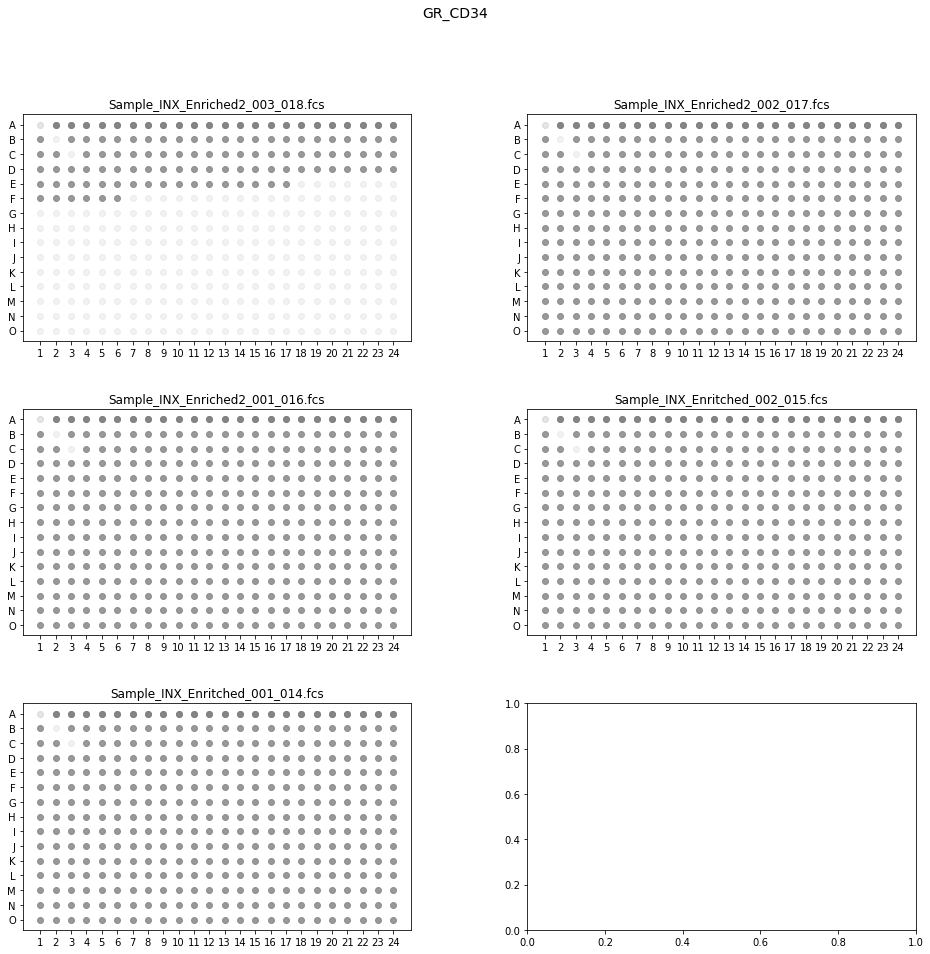

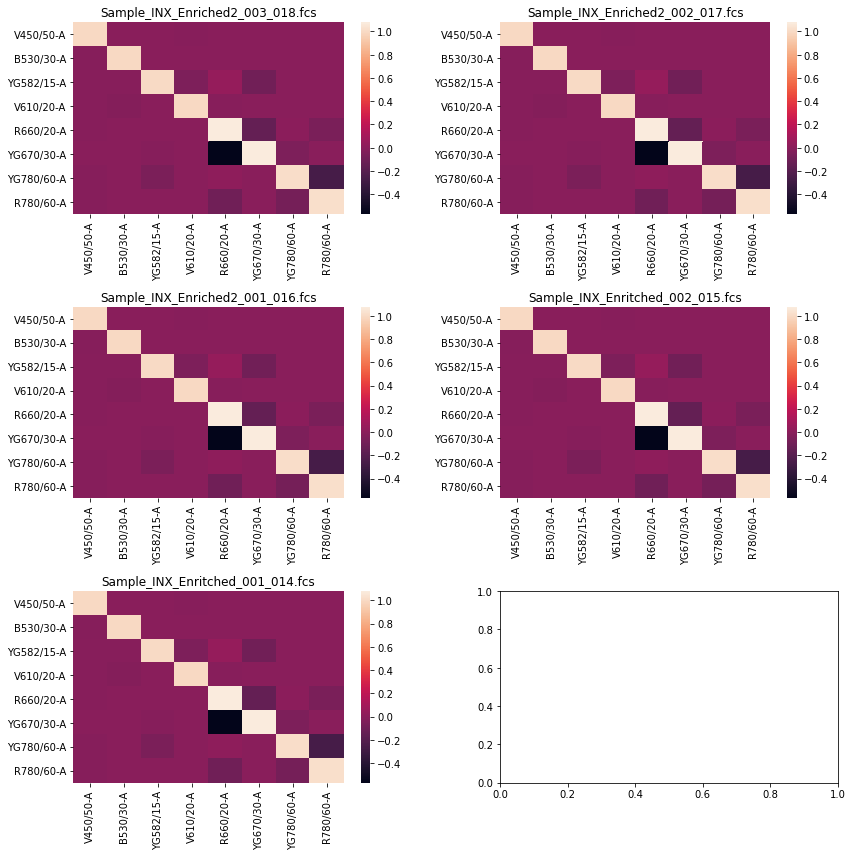

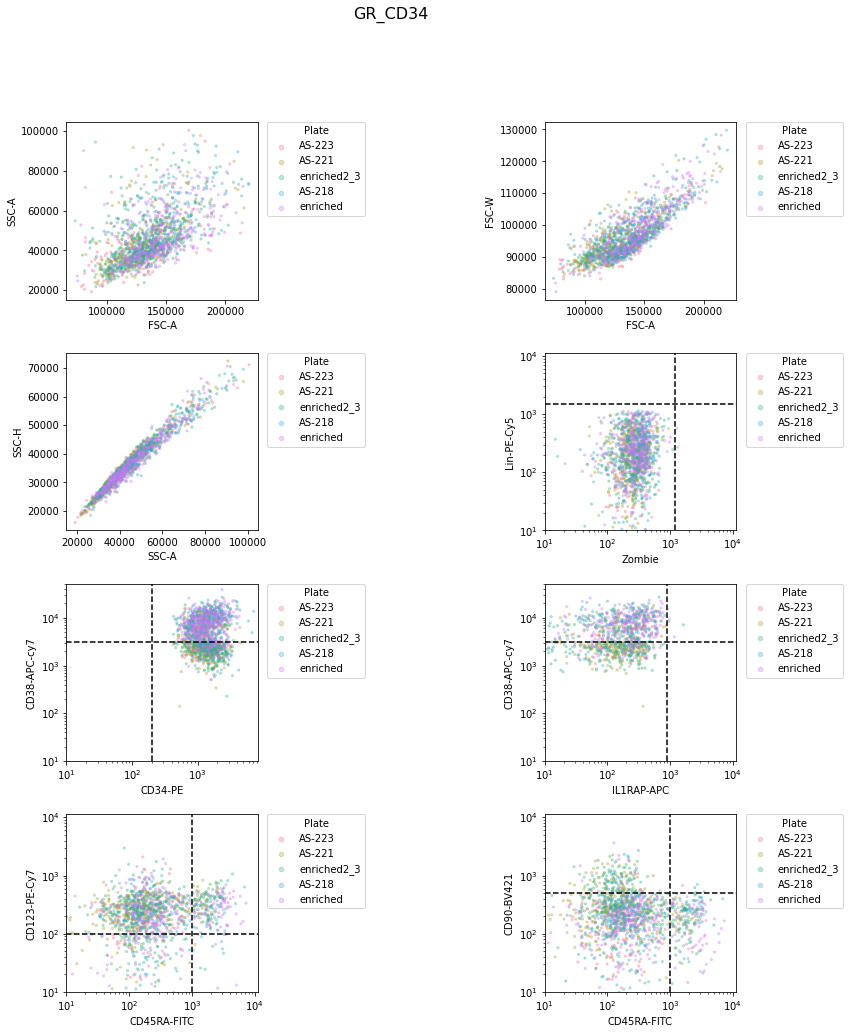

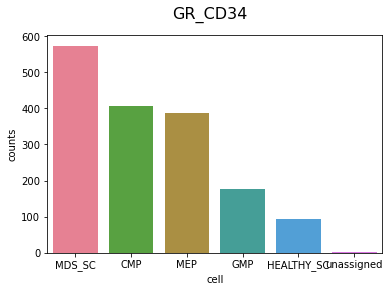

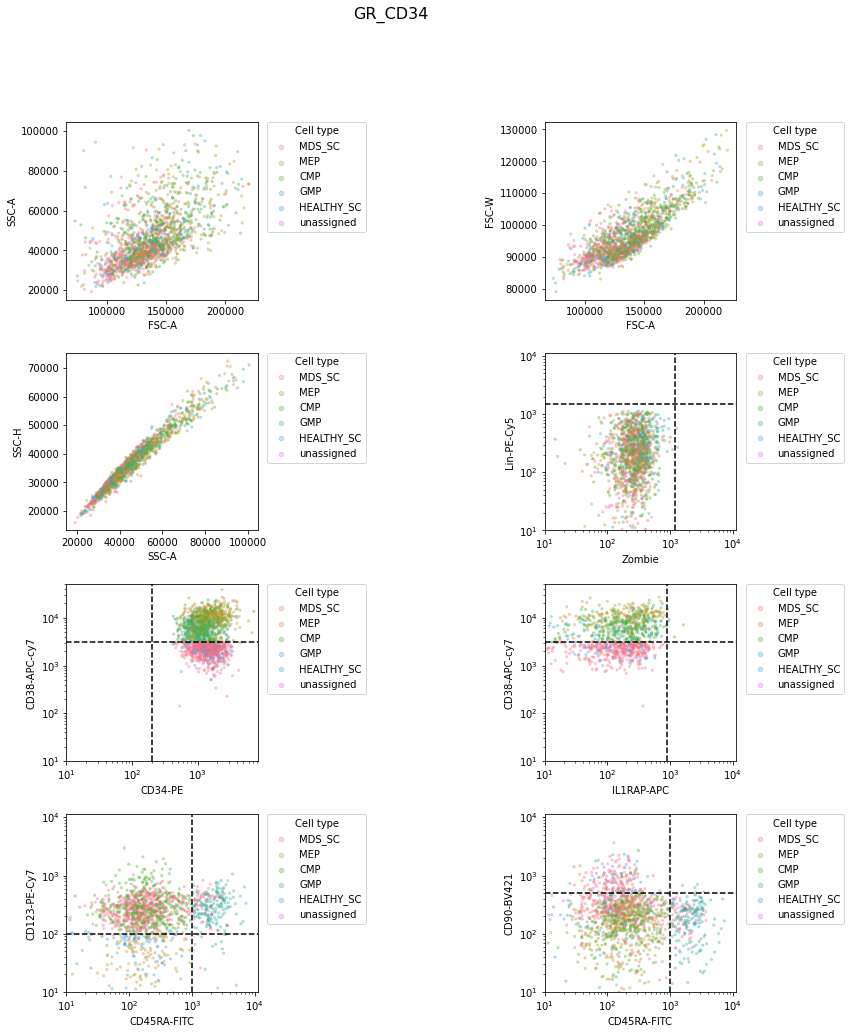

In [7]:
# Now running the code for GR's data (as taken from the jupiter notebook "Index_haps_GR").

#GR CD34 parameters

directory = '../Data/GR_BM/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)

plates = ['AS-223', 'AS-221','enriched2_3', 'AS-218', 'enriched'] 

plate_key = dict(zip(files, plates))

channel_key = {'YG582/15-A': 'CD34-PE', 
               'YG670/30-A': 'Lin-PE-Cy5', 
               'YG780/60-A': 'CD123-PE-Cy7', 
               'V450/50-A': 'CD90-BV421', 
               'V610/20-A': 'Zombie', 
               'B530/30-A': 'CD45RA-FITC', 
               'R660/20-A': 'IL1RAP-APC', 
               'R780/60-A': 'CD38-APC-cy7'
}

logs = ['Lin-PE-Cy5', 'CD34-PE','CD38-APC-cy7', 'CD45RA-FITC','CD123-PE-Cy7','Zombie', 'IL1RAP-APC', 'CD90-BV421' ]

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'Lin-PE-Cy5'], 
    ['CD34-PE', 'CD38-APC-cy7'],
    ['IL1RAP-APC', 'CD38-APC-cy7'],
    ['CD45RA-FITC', 'CD123-PE-Cy7'],
    ['CD45RA-FITC', 'CD90-BV421']
]
#Tweak for GR
gates = {
    'Lin-PE-Cy5': 1500,
    'CD34-PE': 200 ,
    'CD38-APC-cy7': 3100 ,  #3100 = 10% on Flowjo, 3700 = 15% 
    'CD45RA-FITC': 1000 ,
    'CD123-PE-Cy7': 100,
    'Zombie': 1200,
    'IL1RAP-APC': 900,  #set from FlowJo looking at unstained, not convinced this worked
    'CD90-BV421': 500
}


label = 'GR_CD34'
sg.plate_qc(directory, label)
source = sg.get_comp_data(directory, plate_key, channel_key, plot = True)
sg.flowplot_byplate(source, plot_list, logs, gates, label)
CD34assigned = sg.MDS_BM_celltype_assign(source, gates, label, save = False)
sg.flowplot_bycelltype(CD34assigned, plot_list, logs, gates,  label, plot = True, save = False)

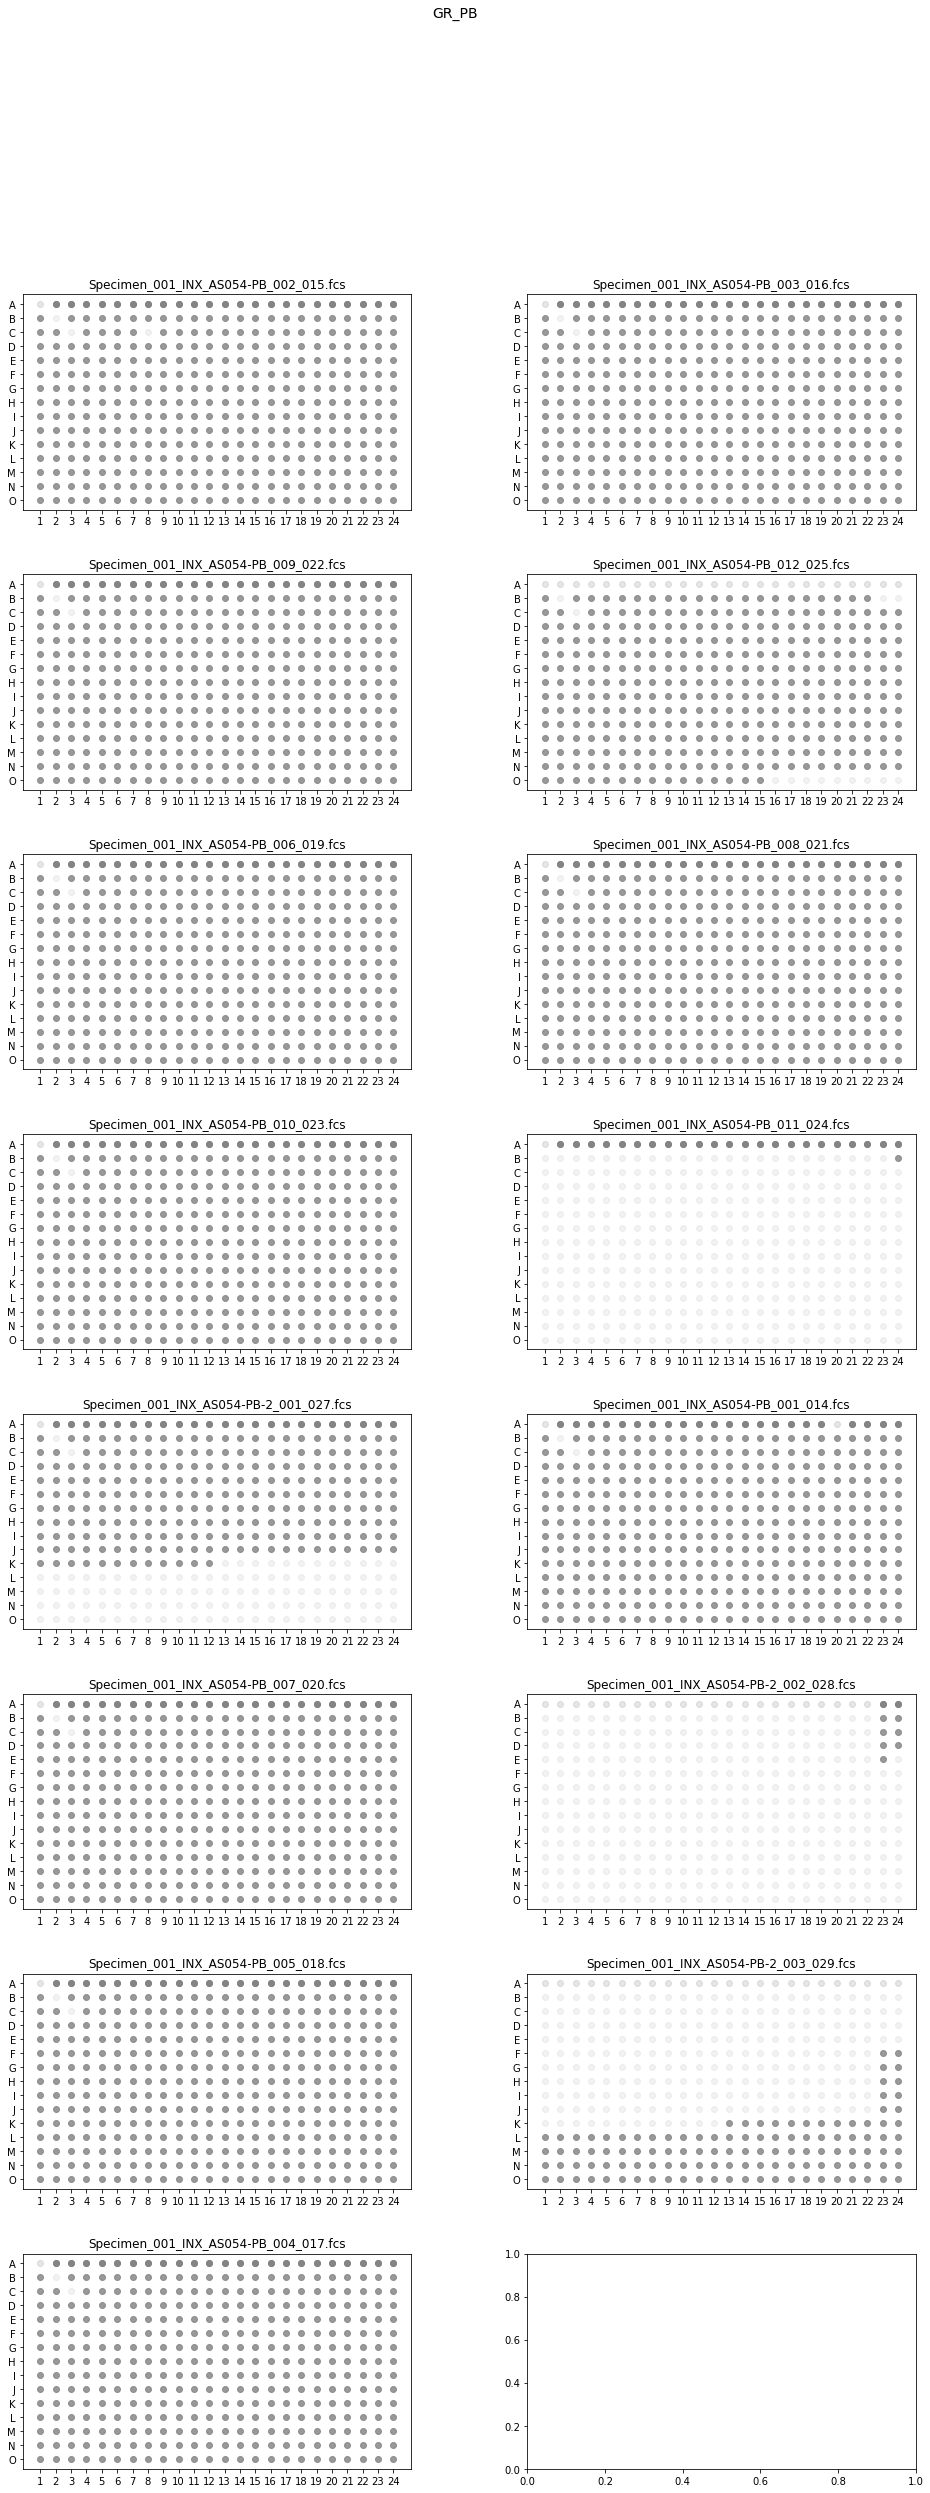

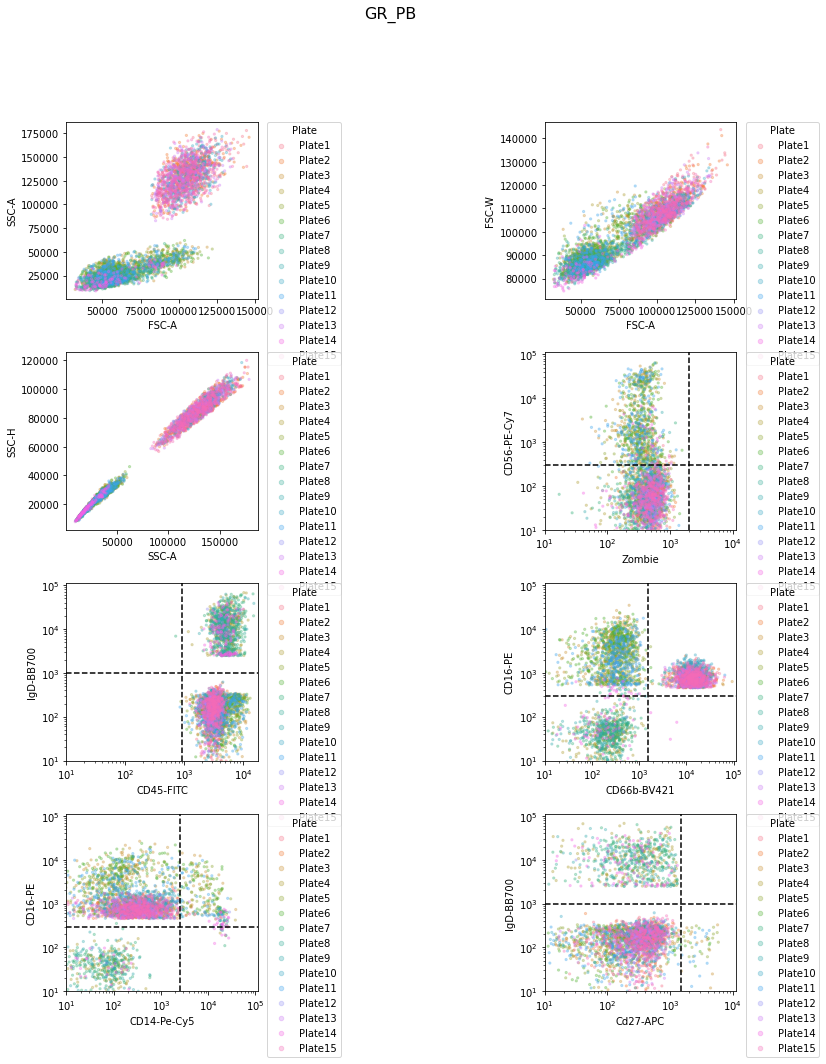

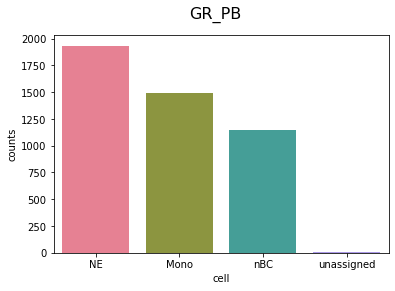

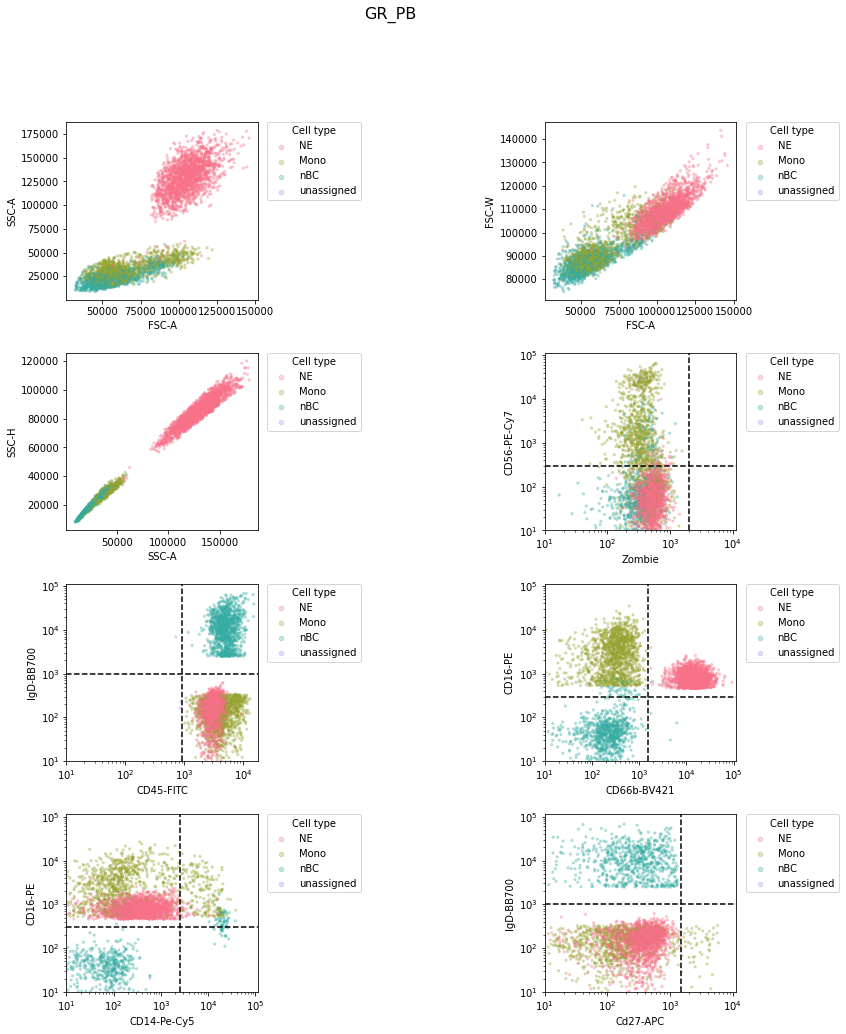

In [8]:
#GR PB parameters

directory = '../Data/GR_PB/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)
    
plates = ['Plate1', 'Plate2', 'Plate3', 'Plate4', 'Plate5', 'Plate6', 'Plate7', 'Plate8', 'Plate9', 'Plate10', 'Plate11', 'Plate12', 'Plate13','Plate14', 'Plate15'] 

plate_key = dict(zip(files, plates))

#Just using placeholder plate names for now
#NEs	1	Plate_1	381	Box_4	D7.6	
#NEs	2	Plate_2	381	used		AS215
#NEs	3	Plate_3	381	used		AS216
#NEs	4	Plate_4	381	Box_4	D7.6	
#NEs	5	Plate_5	381	Box_4	D7.6	
#Monocytes	1	Plate_6	381	used		AS217
#Monocytes	2	Plate_7	381	used		AS214
#Monocytes	3	Plate_8	381	Box_4	D7.6	
#Monocytes	4	Plate_9	381	Box_5	D7.7	
#nBCs	1	Plate_10	381	used		AS2019
#nBCs	2	Plate_11	381	Box_5	D7.7	
#nBCs	3	Plate_12	381	used		AS222

channel_key = {
    'YG582/15-A': 'CD16-PE', 
    'YG670/30-A': 'CD14-Pe-Cy5', 
    'YG780/60-A': 'CD56-PE-Cy7', 
    'V450/50-A': 'CD66b-BV421', 
    'V610/20-A': 'Zombie', 
    'B530/30-A': 'CD45-FITC', 
    'B695/40-A': 'IgD-BB700', 
    'R660/20-A': 'Cd27-APC'
}

logs = ['CD16-PE', 'CD14-Pe-Cy5', 'CD56-PE-Cy7', 'CD66b-BV421', 'Zombie', 'CD45-FITC', 'Cd27-APC', 'R780/60-A', 'IgD-BB700']

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'CD56-PE-Cy7'], 
    ['CD45-FITC', 'IgD-BB700'],
    ['CD66b-BV421', 'CD16-PE'],
    ['CD14-Pe-Cy5', 'CD16-PE'],
    ['Cd27-APC', 'IgD-BB700']
]

gates = {
    'CD16-PE': 300,
    'CD14-Pe-Cy5': 2500 ,
    'CD56-PE-Cy7': 300 ,
    'CD66b-BV421': 1500 ,
    'Zombie': 2000,
    'CD45-FITC': 900,
    'Cd27-APC': 1500,
    'IgD-BB700': 1000,
    'R780/60-A':1000
}


label = 'GR_PB'
sg.plate_qc(directory, label)

source = sg.get_comp_data(directory, plate_key, channel_key, plot = False)
sg.flowplot_byplate(source, plot_list, logs, gates,label)
PBassigned = sg.PB_celltype_assign(source, gates, label, save = False)
sg.flowplot_bycelltype(PBassigned, plot_list, logs, gates,  label, plot = True, save = False)

In [9]:
#Now combine everything into a single df that contains the celltype and flow data for each well
print('Number of CD34 wells (expect 1640) = ', len(CD34assigned))
print('Number of PB wells (expect ?) = ',len(PBassigned))
GR_allcells_assigned = CD34assigned.append(PBassigned, ignore_index=True)
print('Total number of wells = ', len(GR_allcells_assigned))
#GR_alldata_comp_ct.to_csv(f'../Data/Amp_data/EL_comp_celltype_assignment.tsv', sep = '\t')    #Save the well assignment to a file


Number of CD34 wells (expect 1640) =  1640
Number of PB wells (expect ?) =  4578
Total number of wells =  6218
